In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
EXPORT_PLOTS = False
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")
df

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary
0,2,3,True,"06 15, 2010",D. Poston,bought two 85 fl oz hand cream neither dispens...,dispensers don't work
1,5,14,True,"01 7, 2010",chandra,believe me year try many many different hand c...,Best hand cream ever.
2,5,0,True,"04 18, 2018",Maureen G,great hand lotion,Five Stars
3,5,0,True,"04 18, 2018",Terry K,best severely dry skin hand,Five Stars
4,5,0,True,"04 17, 2018",Patricia Wood,best non oily hand cream ever heals overnight,I always have a backup ready.
...,...,...,...,...,...,...,...
591494,5,0,True,"02 22, 2013",Tiffany M.,come time described far work perfectly gamecub...,works on Gamecube
591495,5,0,True,"02 22, 2013",Ian,get tire rebeat mario kart double dash wii get...,"cheap, does the job"
591496,5,14,True,"02 20, 2013",Alex Harker,product excellent ton gamecube game inexpensiv...,Inexpensive and Effective
591497,5,0,True,"02 8, 2013",Cristina Hardwick,arrive way schedule work great need issue woul...,excellent


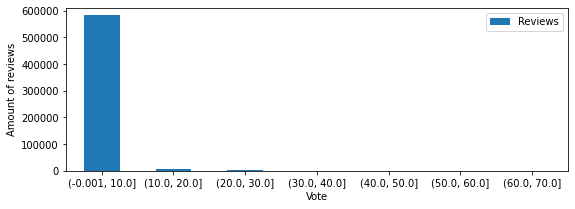

In [24]:
bins = list(range(0, 75, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3), kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Reviews"])
if EXPORT_PLOTS:
    plt.savefig("../../report/img/votes_binned_including_0.pdf", bbox_inches="tight")

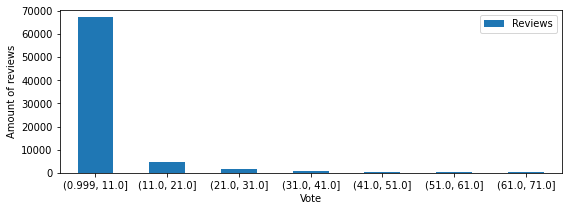

In [25]:
bins = list(range(1, 75, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3), kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Reviews"])
if EXPORT_PLOTS:
    plt.savefig("../../report/img/votes_binned_excluding_0.pdf", bbox_inches="tight")

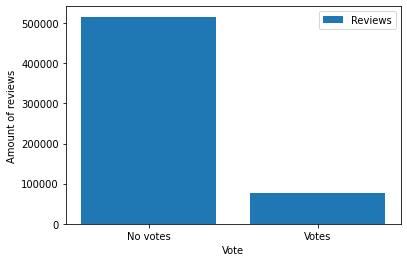

In [26]:
votes = df["vote"].value_counts()
no_votes = votes[0].sum()
has_votes = votes[1:].sum()
plt.bar(["No votes", "Votes"], [no_votes, has_votes])
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Reviews"])
if EXPORT_PLOTS:
    plt.savefig("../../report/img/no_votes_vs_votes.pdf", bbox_inches="tight")

In [27]:
bins = list(range(1, 75, 10))  # [1, 11, 21, 31, 41, 51, 61, 71]


def split_by_ratings(data: pd.DataFrame) -> list[list]:
    split_data = []
    for rating in range(5, 0, -1):
        single_rating_votes = df.loc[df.rating == rating]["vote"]
        binned = single_rating_votes.value_counts(bins=bins)
        split_data.append(binned.to_list())
    return split_data


split_by_ratings(df)

[[37255, 2483, 827, 307, 165, 116, 72],
 [8685, 559, 183, 78, 43, 36, 22],
 [5770, 429, 173, 84, 36, 21, 11],
 [4402, 356, 120, 60, 43, 12, 11],
 [10994, 967, 333, 145, 86, 75, 55]]

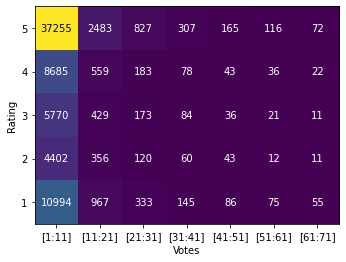

In [35]:
heatmap = np.array(split_by_ratings(df))

bin_labels = [
    "[1:11]",
    "[11:21]",
    "[21:31]",
    "[31:41]",
    "[41:51]",
    "[51:61]",
    "[61:71]",
]
rating_labels = range(5, 0, -1)

fig, ax = plt.subplots()
im = ax.imshow(heatmap)
ax.set_yticks(range(len(rating_labels)), lables="rating")
ax.set_xticks(range(len(bin_labels)), lables="bins")
ax.set_ylabel("Rating")
ax.set_xlabel("Votes")
ax.set_xticklabels(bin_labels)
ax.set_yticklabels(rating_labels)

textcolors = ("black", "white")
threshold = (heatmap.max()) / 2

for i in range(5):
    for j in range(len(bins) - 1):
        text = ax.text(
            j,
            i,
            heatmap[i, j],
            ha="center",
            va="center",
            color=textcolors[int(heatmap[i, j] < threshold)],
        )

if EXPORT_PLOTS:
    plt.savefig("../../report/img/rating_vote_heatmap_excluding_no_votes.pdf")